<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

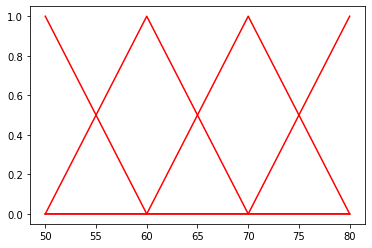

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x, [50,50,60])
plt.figure()
plt.plot(x, slow, 'r', linewidth=1.5, label='slow')
slow = fuzz.trimf(x, [60,70,80])
plt.plot(x, slow, 'r', linewidth=1.5, label='slow')
slow = fuzz.trimf(x, [50,60,70])
plt.plot(x, slow, 'r', linewidth=1.5, label='slow')
slow = fuzz.trimf(x, [70,80,80])
plt.plot(x, slow, 'r', linewidth=1.5, label='slow')
plt.plot



26.666666666666657


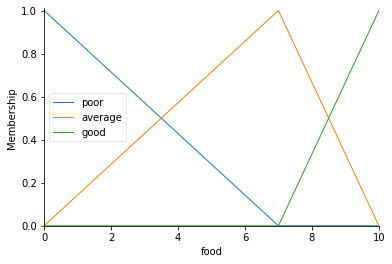

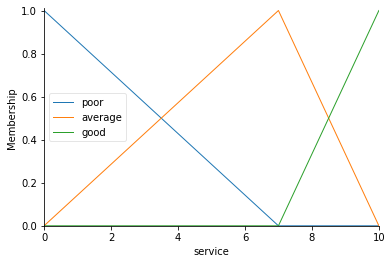

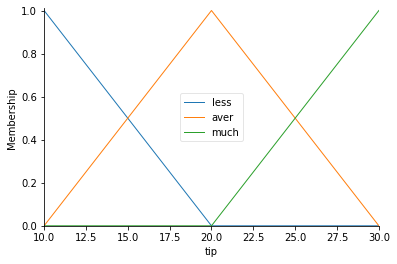

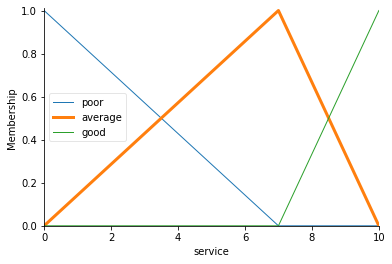

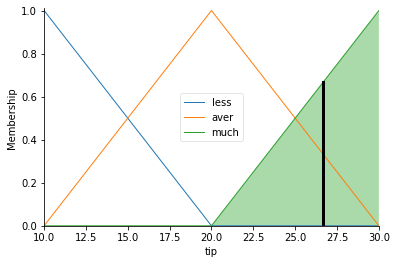

In [24]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
#Tip 10-30%
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food') 
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,7]) #universe là truyền từ np.arrange(0,11,1), biến food, hàm poor
food['average'] = fuzz.trimf(food.universe,[0,7,10])
food['good'] = fuzz.trimf(food.universe,[7,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,7]) 
service['average'] = fuzz.trimf(service.universe,[0,7,10])
service['good'] = fuzz.trimf(service.universe,[7,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20]) 
tip['aver'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['aver'])

rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['aver'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['aver'])

rule7 = ctrl.Rule(food['poor'] | service['poor'],tip['less'])
rule8 = ctrl.Rule(food['average'] & service['average'],tip['aver'])
rule9 = ctrl.Rule(food['good'] | service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
